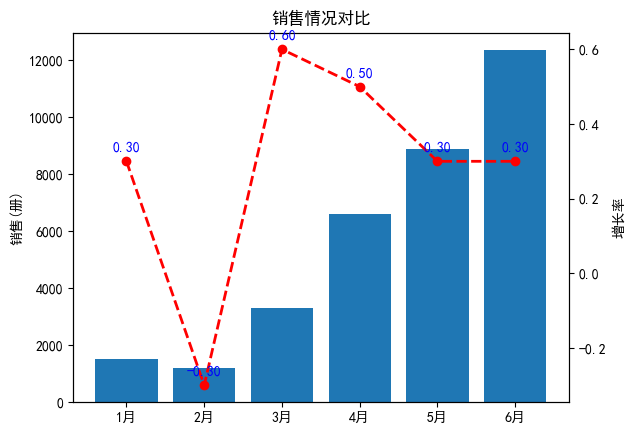

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data/mrbook.xlsx')
# df

x = [i for i in range(1, 7)]
y1 = df['销量']
y2 = df['rate']

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.title('销售情况对比')
plt.xticks(x, [str(i)+'月'for i in range(1, 7)])
ax1.bar(x, y1, label='销量')
ax1.set_ylabel('销售(册)')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='r', linestyle='--', marker='o', linewidth=2)
ax2.set_ylabel('增长率')

for a,b in zip(x, y2):
    plt.text(a, b+0.02, '%.2f'%b, ha='center', va='bottom', fontsize=10, color='b')
plt.show()

### 堆叠柱形图

d:\Learning-Material\venv\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


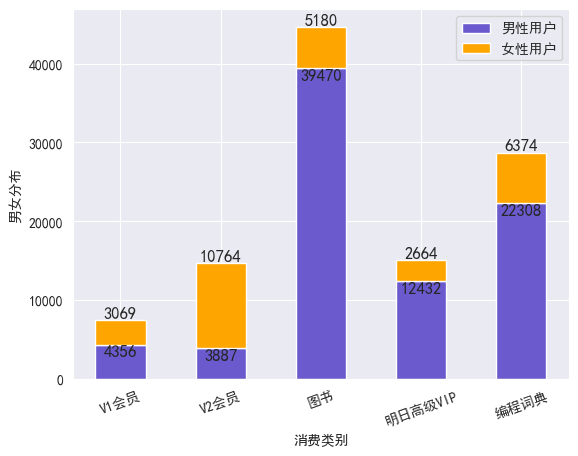

,类别,性别,买家会员名
1,V1会员,男,44
3,V2会员,男,13
5,图书,男,381
7,明日高级VIP,男,14
9,编程词典,男,21


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 设置模式
sns.set_style('darkgrid')
# 用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei'] 

df = pd.read_excel('data/mrtb_data.xlsx')
# df

# 根据类别分组， 计算每组中 买家实际支付金额 的总和
df1 = df.groupby(['类别'])['买家实际支付金额'].sum()
# df1

# 将消费的总净额转成列表
num = np.array(list(df1))

#  根据 类别 和 性别 分组， 统计不同买家的人数， 并重置索引
df2 = df.groupby(['类别', '性别'])['买家会员名'].count().reset_index()
# df2

# 分别提取 男性 与 女性 的数据
male_df = df2[df2['性别']=='男']
female_df = df2[df2['性别']=='女']

#  将男性， 女性买家数 转成列表
men_lst = list(male_df['买家会员名'])
women_lst = list(female_df['买家会员名'])


# 计算男性用户比例
ratio = np.array(men_lst)/(np.array(men_lst) + np.array(women_lst))
# 输出的精度
np.set_printoptions(precision = 2)

m = num * ratio
w = num * (1 - ratio)

# 删除 类别中的重复数据
df3 = df2.drop_duplicates(['类别'])
# 将 类别 转成 列表
name = list(df3['类别'])

# 绘制图标
width = 0.5

x = np.arange(len(name))

plt.bar(x, m, width=width, color='slateblue', label='男性用户')
plt.bar(x, w, width=width, color='orange', label='女性用户', bottom=m)

plt.xlabel('消费类别')
plt.ylabel('男女分布')

plt.xticks(x, name, rotation=20)

for a, b in zip(x, m):
    plt.text(a, b, '%.0f'%b, ha='center', va='top', fontsize=12)

for a, b, c in zip(x, w, m):
    plt.text(a, b+c, '%.0f'%b, ha='center', va='bottom', fontsize=12)

plt.legend()
plt.show()


male_df

### 统计双色球中奖热力图

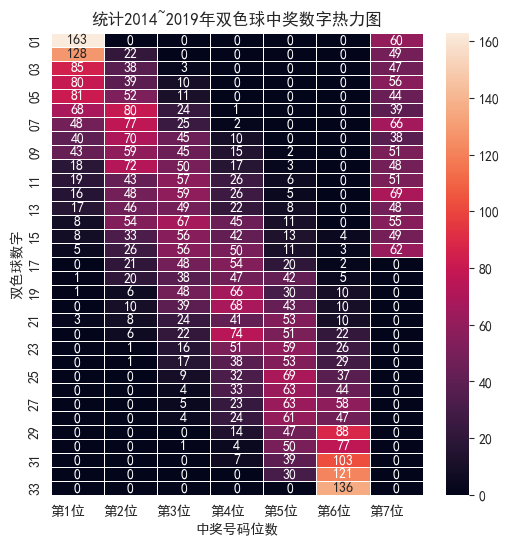

In [40]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 背景设置
sns.set_style("darkgrid")
#  解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']

# 获取数据
df = pd.read_csv('data/data.csv', encoding='gb2312')

# 画布设置
plt.figure(figsize=(6,6))

series = df['中奖号码'].str.split('  ', expand=True)

# 对每一位中奖号码统计出现次数，(统计每一列中不同数字出现的次数)
df1 = df.groupby(series[0]).size()      # 第一位置
df2 = df.groupby(series[1]).size()      # 第二位置
df3 = df.groupby(series[2]).size()      # 第三位置
df4 = df.groupby(series[3]).size()      # 第四位置
df5 = df.groupby(series[4]).size()      # 第五位置
df6 = df.groupby(series[5]).size()      # 第六位置
df7 = df.groupby(series[6]).size()      # 第七位置

# 横向合并
data = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=1, sort=True)

# 空值处理
data = data.fillna(0)

# 浮点数转换成整数显示 
data = data.round(0).astype(int)

#  绘制热力图
plt.title('统计2014~2019年双色球中奖数字热力图')

# 绘制 annot数值是否显示,fmt参数控制数据的格式,I表示线宽
sns.heatmap(data, annot=True, fmt='d', lw=0.5)

#  设置x轴与y轴的标签
plt.xlabel('中奖号码位数')
plt.ylabel('双色球数字')

plt.xticks(range(0,7), ['第' + str(i) + '位' for i in range(1,8)], ha='left')
plt.show()